In [87]:
# First we must import pandas.
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
# Next, we need to define the filepath to our file.

filepath = ('/Users/jesse/OneDrive/Desktop/Project/Data_csv.csv')

In [89]:
# Now we can load our data.

drugData = pd.read_csv(filepath)

In [90]:
print(type(drugData))

<class 'pandas.core.frame.DataFrame'>


In [91]:
drugData.head(3)

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
0,AUS,1971,15.992,0.727,35.720,NaN,462.11
1,AUS,1972,15.091,0.686,36.056,NaN,475.11
2,AUS,1973,15.117,0.681,39.871,NaN,533.47


In [92]:
drugData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOCATION     1036 non-null   object 
 1   TIME         1036 non-null   int64  
 2   PC_HEALTHXP  1036 non-null   float64
 3   PC_GDP       1036 non-null   float64
 4   USD_CAP      1036 non-null   float64
 5   FLAG_CODES   63 non-null     object 
 6   TOTAL_SPEND  1036 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 56.8+ KB


In [93]:
drugData.describe()

,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND
count,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000
mean,1996.809846,16.406307,1.170948,295.046989,11765.423118
std,12.498330,6.389064,0.465635,209.152134,34878.286123
min,1970.000000,5.545000,0.207000,3.160000,6.290000
25%,1987.000000,11.516250,0.768250,111.098500,728.180000
50%,1999.000000,14.967500,1.141500,266.332000,2349.570000
75%,2007.000000,20.590500,1.523250,446.109500,7778.180000
max,2016.000000,40.239000,2.797000,1162.399000,373009.910000


In [94]:
drugData['LOCATION'].unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'EST', 'SVN', 'ISR', 'LVA', 'LTU', 'RUS'],
      dtype=object)

In [95]:
drugData['LOCATION'].nunique()

36

In [96]:
drugData['TIME'].value_counts()


2007    33
2013    33
2006    33
2012    32
2005    32
2014    32
2009    32
2010    32
2011    32
2008    31
2004    31
2015    30
2003    28
2002    28
2001    26
2000    26
1997    25
1996    25
1995    25
1999    24
1994    24
1990    24
1992    23
1993    23
1991    22
1998    21
1988    20
1985    20
1989    20
1987    19
1986    19
1984    18
1980    18
1981    17
1982    17
1983    17
1979    13
1978    13
1977    13
1976    13
1975    13
1970    11
1971    11
1972    11
1974    11
1973    11
2016     4
Name: TIME, dtype: int64

In [97]:
drugData['Total HC Exp in mill USD'] = drugData.apply(lambda x: x['TOTAL_SPEND'] / (x['PC_HEALTHXP']/100), axis=1)

In [98]:
drugData['GDP (PPP) in mill USD'] = drugData.apply(lambda x: x['TOTAL_SPEND'] / (x['PC_GDP']/100), axis=1)

In [99]:
drugData['Pop in mill'] = drugData.apply(lambda x: x['TOTAL_SPEND'] / x['USD_CAP'], axis=1)

In [100]:
drugData['GDP (PPP) per Capita in USD'] = drugData.apply(lambda x: x['GDP (PPP) in mill USD'] / x['Pop in mill'], axis=1)

In [101]:
drugData.head()

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND,Total HC Exp in mill USD,GDP (PPP) in mill USD,Pop in mill,GDP (PPP) per Capita in USD
0,AUS,1971,15.992,0.727,35.720,NaN,462.11,2889.632316,63563.961486,12.937010,4913.342503
1,AUS,1972,15.091,0.686,36.056,NaN,475.11,3148.300311,69258.017493,13.177002,5255.976676
2,AUS,1973,15.117,0.681,39.871,NaN,533.47,3528.940927,78336.270191,13.379900,5854.772394
3,AUS,1974,14.771,0.755,47.559,NaN,652.65,4418.455081,86443.708609,13.722955,6299.205298
4,AUS,1975,11.849,0.682,47.561,NaN,660.76,5576.504346,96885.630499,13.892895,6973.753666


In [102]:
mergedData_2013 = drugData.loc[drugData['TIME'] == 2013,:]

In [103]:
mergedData_2013.head()

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND,Total HC Exp in mill USD,GDP (PPP) in mill USD,Pop in mill,GDP (PPP) per Capita in USD
42,AUS,2013,14.989,1.320,627.402,NaN,14503.87,96763.426513,1.098778e+06,23.117347,47530.454545
67,AUT,2013,12.222,1.245,594.130,NaN,5037.85,41219.522173,4.046466e+05,8.479373,47721.285141
108,BEL,2013,14.273,1.480,642.958,NaN,7190.08,50375.394101,4.858162e+05,11.182814,43443.108108
154,CAN,2013,17.575,1.778,783.949,NaN,27560.08,156814.110953,1.550061e+06,35.155450,44091.619798
179,CZE,2013,17.932,1.384,421.887,NaN,4435.83,24736.950703,3.205079e+05,10.514261,30483.164740


In [104]:
Xvar = mergedData_2013[['GDP (PPP) per Capita in USD']]
Yvar = mergedData_2013[['USD_CAP']]

In [105]:
Yvar.head(2)

,USD_CAP
42,627.402
67,594.130


In [106]:
Xvar.head(2)

,GDP (PPP) per Capita in USD
42,47530.454545
67,47721.285141


In [107]:
Xvar2 = sm.add_constant(Xvar)

In [108]:
linearModel = sm.OLS(Yvar, Xvar2).fit()

In [109]:
print(linearModel.summary())

                            OLS Regression Results                            
Dep. Variable:                USD_CAP   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     5.593
Date:                Sat, 03 Dec 2022   Prob (F-statistic):             0.0245
Time:                        10:46:40   Log-Likelihood:                -213.73
No. Observations:                  33   AIC:                             431.5
Df Residuals:                      31   BIC:                             434.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

Text(0, 0.5, 'Drug Expenditure per Capita in USD')

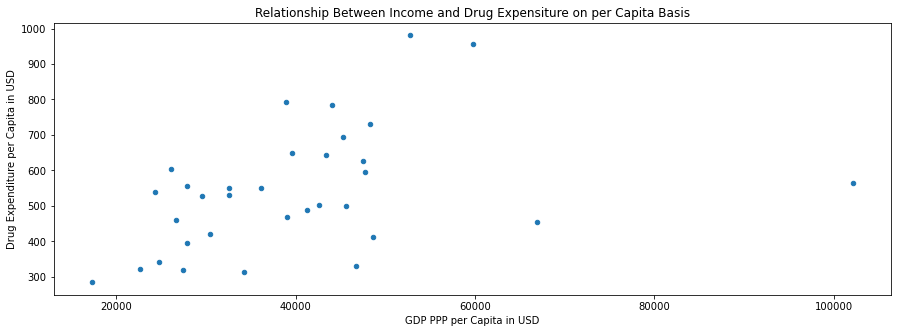

In [116]:
fig, axs = plt.subplots(1, 1, figsize=(15, 5))
mergedData_2013[['USD_CAP', 'GDP (PPP) per Capita in USD']].plot(kind='scatter',ax=axs, x='GDP (PPP) per Capita in USD', y='USD_CAP')
axs.set_title('Relationship Between Income and Drug Expensiture on per Capita Basis')
axs.set_xlabel('GDP PPP per Capita in USD')
axs.set_ylabel('Drug Expenditure per Capita in USD')